<a href="https://colab.research.google.com/github/marco-milanesi/dynamic-weighing/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic weighing

In [205]:
!wget https://raw.githubusercontent.com/EdoGitMira/Progetto_Laboratorio_Misure_pesatura_dinamica/main/dataset/with_outlier/dataset_interval_10.csv

--2021-12-21 14:28:17--  https://raw.githubusercontent.com/EdoGitMira/Progetto_Laboratorio_Misure_pesatura_dinamica/main/dataset/with_outlier/dataset_interval_10.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1030377 (1006K) [text/plain]
Saving to: ‘dataset_interval_10.csv’

dataset_interval_10 100%[===================>]   1006K  --.-KB/s    in 0.03s   

2021-12-21 14:28:17 (31.7 MB/s) - ‘dataset_interval_10.csv’ saved [1030377/1030377]



# Linear Regression

## Import packages


In [206]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## Loading Data

In [207]:
data = pd.read_csv('dataset_interval_10.csv',sep=';')
print("Loaded: ",len(data))
y = data.values[:,1]
x = data.values[:,3:]
data

Loaded:  2447


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0,0.940722,80,0.940202,0.016313,0.936978,0.021029,0.940547,0.016083,0.943013,0.025418,0.938309,0.010566,0.941080,0.022807,0.937000,0.013442,0.943749,0.016470,0.940019,0.020011,0.939027,0.011262
1,1,0.940724,80,0.941354,0.020371,0.937475,0.019451,0.942571,0.016119,0.938958,0.008435,0.940977,0.012758,0.940964,0.021998,0.939789,0.011339,0.938094,0.028397,0.940992,0.021170,0.942236,0.022112
2,2,0.940726,80,0.944987,0.021547,0.936535,0.018374,0.939822,0.015440,0.939856,0.013733,0.938177,0.020379,0.944478,0.015504,0.936796,0.026083,0.941746,0.012770,0.940943,0.021793,0.941098,0.016208
3,3,0.940727,80,0.941066,0.015176,0.941129,0.020257,0.939300,0.012861,0.939834,0.022807,0.940014,0.016695,0.937948,0.013028,0.942083,0.010384,0.942534,0.017276,0.940511,0.014552,0.936675,0.019692
4,4,0.940729,80,0.940949,0.013512,0.940676,0.018013,0.938735,0.009822,0.940648,0.019794,0.937811,0.014198,0.941861,0.013287,0.942442,0.017937,0.937691,0.013646,0.942408,0.020360,0.936740,0.016222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,2442,1.231898,615,1.231073,0.043474,1.231769,0.032881,1.234961,0.027156,1.230480,0.021939,1.231998,0.017024,1.235081,0.018138,1.230282,0.012353,1.229078,0.021833,1.237579,0.023748,1.234748,0.014821
2443,2443,1.231903,615,1.245092,0.025002,1.223159,0.009491,1.229727,0.066215,1.249372,0.074724,1.236137,0.039812,1.220874,0.025311,1.231896,0.027310,1.235921,0.020899,1.225354,0.016641,1.230547,0.016530
2444,2444,1.231909,615,1.235532,0.019034,1.237572,0.014366,1.230789,0.010435,1.231229,0.013403,1.237530,0.007513,1.226860,0.012879,1.234310,0.011361,1.234444,0.011262,1.232254,0.007064,1.237071,0.016666
2445,2445,1.231914,615,1.228115,0.017775,1.234092,0.011449,1.232797,0.023822,1.229796,0.015587,1.233589,0.015369,1.235448,0.019554,1.232772,0.015915,1.230504,0.015987,1.232582,0.017203,1.233575,0.016226


# PCA

Total Variance in our dataset is:  0.9498713996692015
The 95% variance we want to have is:  0.9023778296857414

Variance explain with 2 components:  0.949136471294806
Variance explain with 5 components:  0.9494786515168322
Variance explain with 10 components:  0.9497208782246281
Variance explain with 12 components:  0.9497767338065947
Variance explain with 18 components:  0.9498634855522919
Variance explain with 20 components:  0.9498713996692015


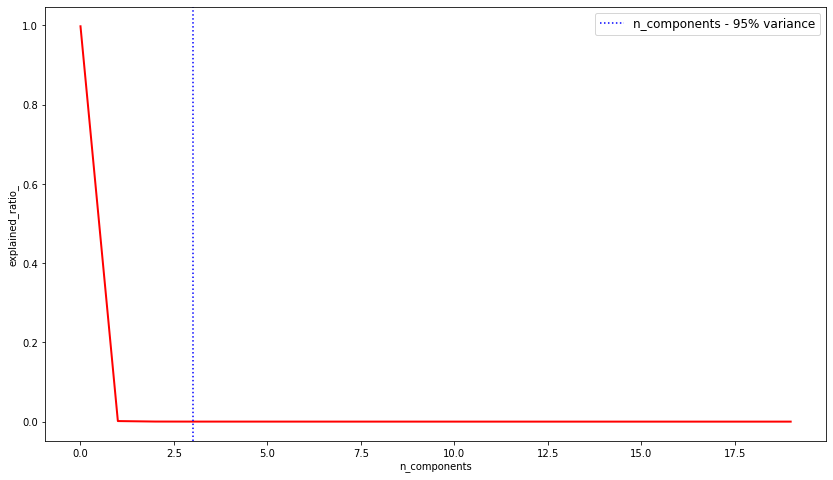

In [208]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

n_components = x.shape[1]

pca = PCA(n_components=n_components, random_state=453)
x_r = pca.fit(x).transform(x)

total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ",total_variance)
var_95 = total_variance*0.95
print("The 95% variance we want to have is: ", var_95)
print("")

a = zip(range(0,n_components),pca.explained_variance_)
a = pd.DataFrame(a,columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95 %
print("Variance explain with 2 components: ", sum(a["Explained Variance"][0:2]))
print("Variance explain with 5 components: ", sum(a["Explained Variance"][0:5]))
print("Variance explain with 10 components: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 12 components: ", sum(a["Explained Variance"][0:12]))
print("Variance explain with 18 components: ", sum(a["Explained Variance"][0:18]))
print("Variance explain with 20 components: ", sum(a["Explained Variance"][0:20]))



# Plotting the data
plt.figure(1, figsize=(14,8))
plt.plot(pca.explained_variance_ratio_,linewidth=2, c='r')
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95 %
plt.axvline(3,linestyle=':', label='n_components - 95% variance',c = 'blue')
plt.legend(prop=dict(size=12))
plt.show()            
            
            

In [209]:
# Running PCA again

pca_new = PCA(n_components=3, random_state=453)
x_r = pca_new.fit(x).transform(x)

## Scree plot

In [210]:
explained_variance = pca_new.explained_variance_ratio_
explained_variance

array([9.97811134e-01, 1.41515248e-03, 1.98122085e-04])

In [211]:
import numpy as np
import plotly.express as px

In [212]:
explained_variance = np.insert(explained_variance, 0, 0)
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.997811,0.998
2,PC2,0.001415,0.999
3,PC3,0.000198,0.999


In [213]:
import plotly.graph_objects as go

fig = go.Figure()

fig = px.bar(df_explained_variance, 
             
             text='Explained Variance',
             width=800)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.show()

## Train test and split

In [223]:
from collections import Counter
print("Labels distribution:",Counter(y))

# train-test split
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_r, y, random_state=30,train_size=0.5)
print("Train labels distribution:", Counter(y_train))
print("Test labels distribution:",Counter(y_test))




Labels distribution: Counter({0.940721614597785: 1, 0.940723572948062: 1, 0.9407255312983388: 1, 0.9407274896486156: 1, 0.9407294479988926: 1, 0.9407314063491696: 1, 0.9407333646994462: 1, 0.9407353230497232: 1, 0.9407372814: 1, 0.940739239750277: 1, 0.9407411981005536: 1, 0.9407431564508304: 1, 0.9407451148011076: 1, 0.9407470731513844: 1, 0.9407490315016612: 1, 0.9407509898519382: 1, 0.9407529482022148: 1, 0.9407549065524916: 1, 0.9407568649027686: 1, 0.9407588232530456: 1, 0.9407607816033224: 1, 0.9407627399535992: 1, 0.940764698303876: 1, 0.9407666566541528: 1, 0.9407686150044297: 1, 0.9407705733547066: 1, 0.9407725317049834: 1, 0.9407744900552604: 1, 0.9407764484055372: 1, 0.9407784067558141: 1, 0.94856761507297: 1, 0.9485682133120688: 1, 0.948568811551168: 1, 0.948569409790267: 1, 0.948570008029366: 1, 0.9485706062684649: 1, 0.948571204507564: 1, 0.948571802746663: 1, 0.9485724009857618: 1, 0.9485729992248609: 1, 0.9485735974639599: 1, 0.9485741957030588: 1, 0.9485747939421579: 1

In [224]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1223, 3)
(1224, 3)
(1223,)
(1224,)


## Train the model

In [225]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

## Predict test results

In [226]:
y_pred = ml.predict(x_test)
print(y_pred)

[1.13919708 1.09911133 1.06895051 ... 1.08623671 0.91441928 1.08658852]


In [227]:
coefficents = ml.coef_
coefficents

array([-0.05280322,  0.33215835,  0.19180104])

y = β0 + β1 · x1 +  β2 · x2 + ... + βn · xn

## Evaluate the model

In [228]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.24392689383414867

## Plot the results

Text(0.5, 1.0, 'Actual vs Predicted')

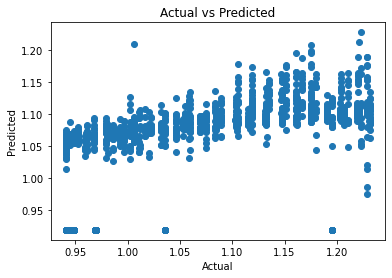

In [220]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [229]:
y_test

array([1.23177976, 1.08367601, 1.0056349 , ..., 1.03146871, 1.03589008,
       1.05995622])

In [230]:
y_pred

array([1.13919708, 1.09911133, 1.06895051, ..., 1.08623671, 0.91441928,
       1.08658852])

In [221]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))


0.006335198745377728
0.07959396173942926


In [222]:
#Example on R_Square and Adjusted R Square
import statsmodels.api as sm
X_addC = sm.add_constant(y_test)
result = sm.OLS(y_pred, X_addC).fit()
print(result.rsquared, result.rsquared_adj)


0.26260019226469533 0.261996755433488
